In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df = df.dropna()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])


In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], 1, X.shape[1])


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [9]:
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = rnn_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.6307 - loss: 0.7089 - val_accuracy: 0.7711 - val_loss: 0.4848
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7549 - loss: 0.4992 - val_accuracy: 0.7870 - val_loss: 0.4376
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7848 - loss: 0.4638 - val_accuracy: 0.7844 - val_loss: 0.4310
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7731 - loss: 0.4676 - val_accuracy: 0.7915 - val_loss: 0.4268
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7786 - loss: 0.4459 - val_accuracy: 0.7924 - val_loss: 0.4263
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7988 - loss: 0.4259 - val_accuracy: 0.7933 - val_loss: 0.4285
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8044 - loss: 0.4384 - val_accuracy: 0.7924 - val_loss: 0.4194
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7815 - loss: 0.4401 - val_accuracy:

In [11]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])
gru_model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = gru_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6632 - loss: 0.6606 - val_accuracy: 0.7507 - val_loss: 0.5572
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7567 - loss: 0.5104 - val_accuracy: 0.7507 - val_loss: 0.5003
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7807 - loss: 0.4683 - val_accuracy: 0.7915 - val_loss: 0.4313
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7864 - loss: 0.4426 - val_accuracy: 0.7950 - val_loss: 0.4215
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7923 - loss: 0.4285 - val_accuracy: 0.7897 - val_loss: 0.4299
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8084 - loss: 0.4202 - val_accuracy: 0.7897 - val_loss: 0.4233
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7839 - loss: 0.4437 - val_accuracy: 0.7977 - val_loss: 0.4254
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7992 - loss: 0.4311 - val_accuracy

In [12]:
rnn_loss, rnn_acc = rnn_model.evaluate(X_test, y_test)
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)
gru_loss, gru_acc = gru_model.evaluate(X_test, y_test)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8066 - loss: 0.4130
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8159 - loss: 0.4044
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.4105


In [13]:
comparison_df = pd.DataFrame({
    'Model': ['RNN', 'LSTM', 'GRU'],
    'Loss': [rnn_loss, lstm_loss, gru_loss],
    'Accuracy': [rnn_acc, lstm_acc, gru_acc]
})
print("\nModel Comparison:")
print(comparison_df)



Model Comparison:
  Model      Loss  Accuracy
0   RNN  0.415025  0.802697
1  LSTM  0.409955  0.809794
2   GRU  0.415239  0.801987


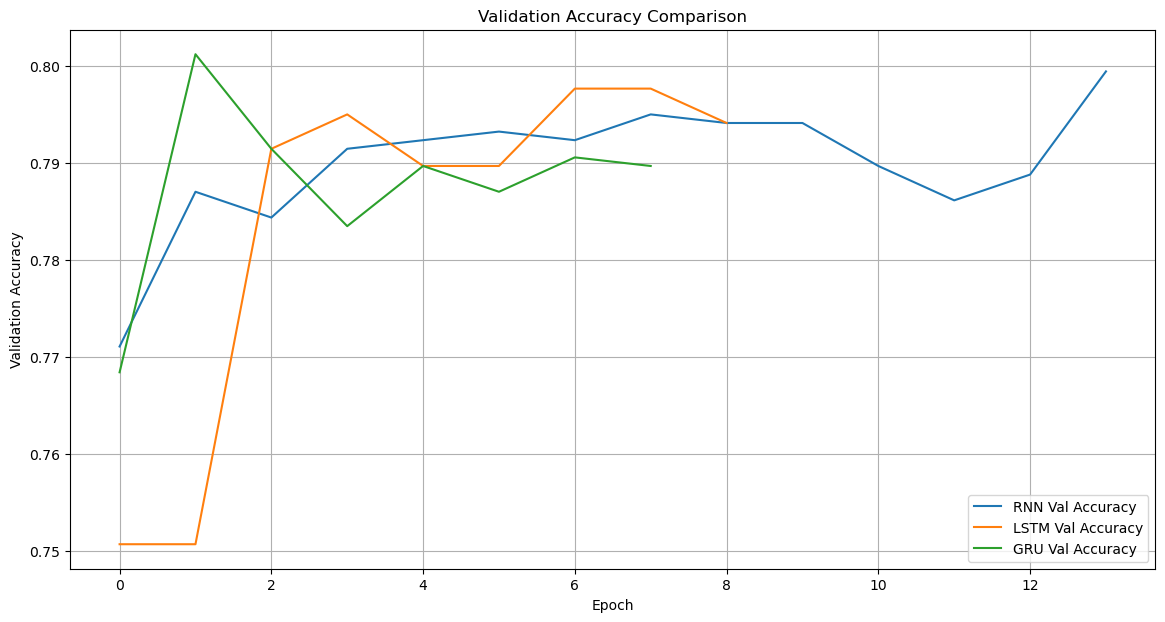

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(history_rnn.history['val_accuracy'], label='RNN Val Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


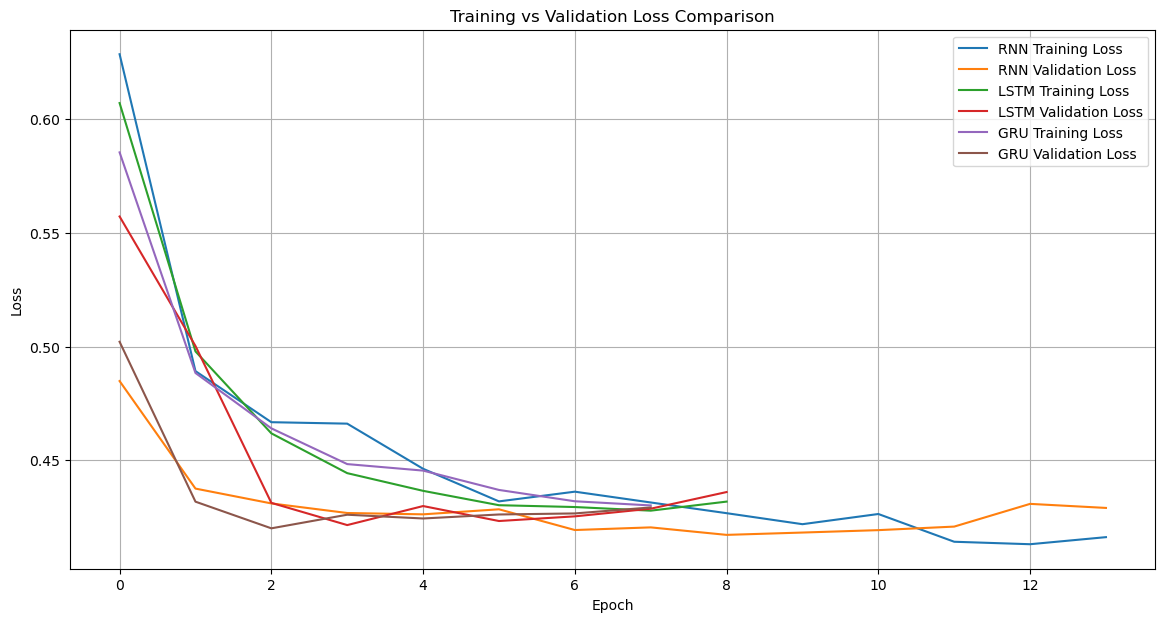

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')

plt.title('Training vs Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


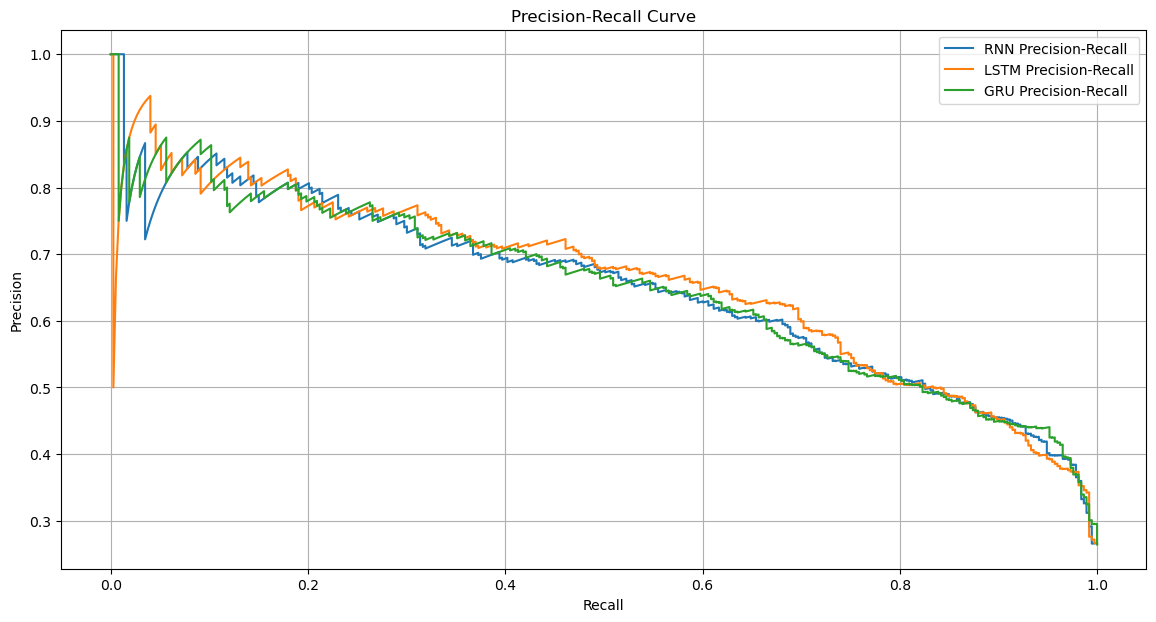

In [18]:
from sklearn.metrics import precision_recall_curve
y_pred_rnn = rnn_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)
y_pred_gru = gru_model.predict(X_test)
precision_rnn, recall_rnn, _ = precision_recall_curve(y_test, y_pred_rnn)
precision_lstm, recall_lstm, _ = precision_recall_curve(y_test, y_pred_lstm)
precision_gru, recall_gru, _ = precision_recall_curve(y_test, y_pred_gru)
plt.figure(figsize=(14, 7))
plt.plot(recall_rnn, precision_rnn, label='RNN Precision-Recall')
plt.plot(recall_lstm, precision_lstm, label='LSTM Precision-Recall')
plt.plot(recall_gru, precision_gru, label='GRU Precision-Recall')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


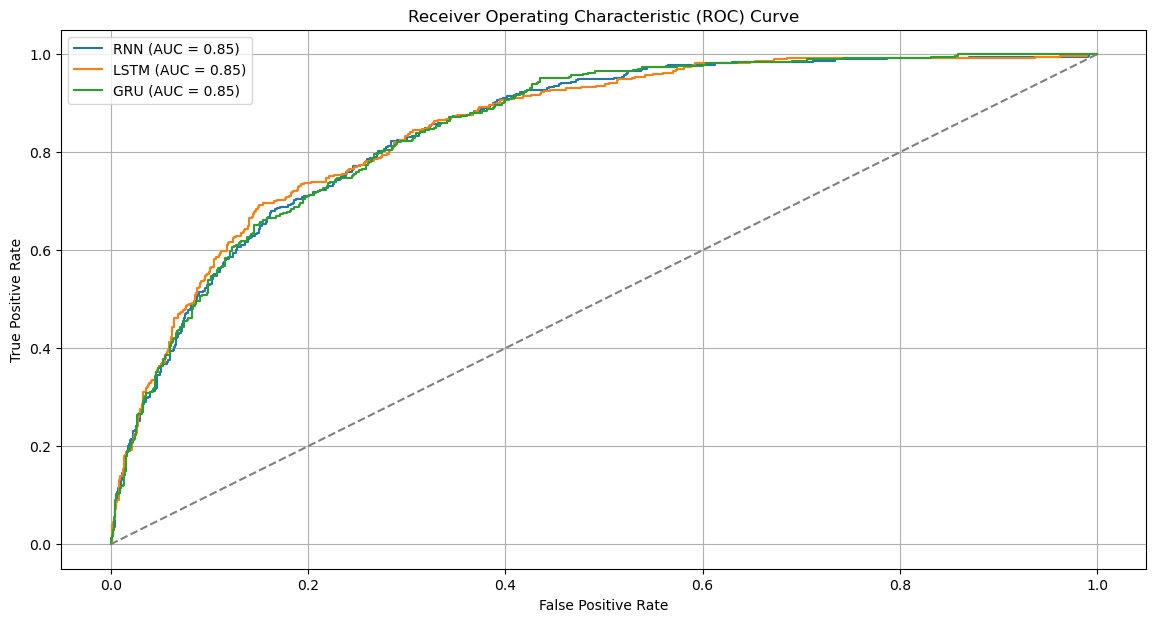

In [19]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_gru)

roc_auc_rnn = auc(fpr_rnn, tpr_rnn)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
roc_auc_gru = auc(fpr_gru, tpr_gru)

# Plot ROC curve
plt.figure(figsize=(14, 7))
plt.plot(fpr_rnn, tpr_rnn, label=f'RNN (AUC = {roc_auc_rnn:.2f})')
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_gru, tpr_gru, label=f'GRU (AUC = {roc_auc_gru:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


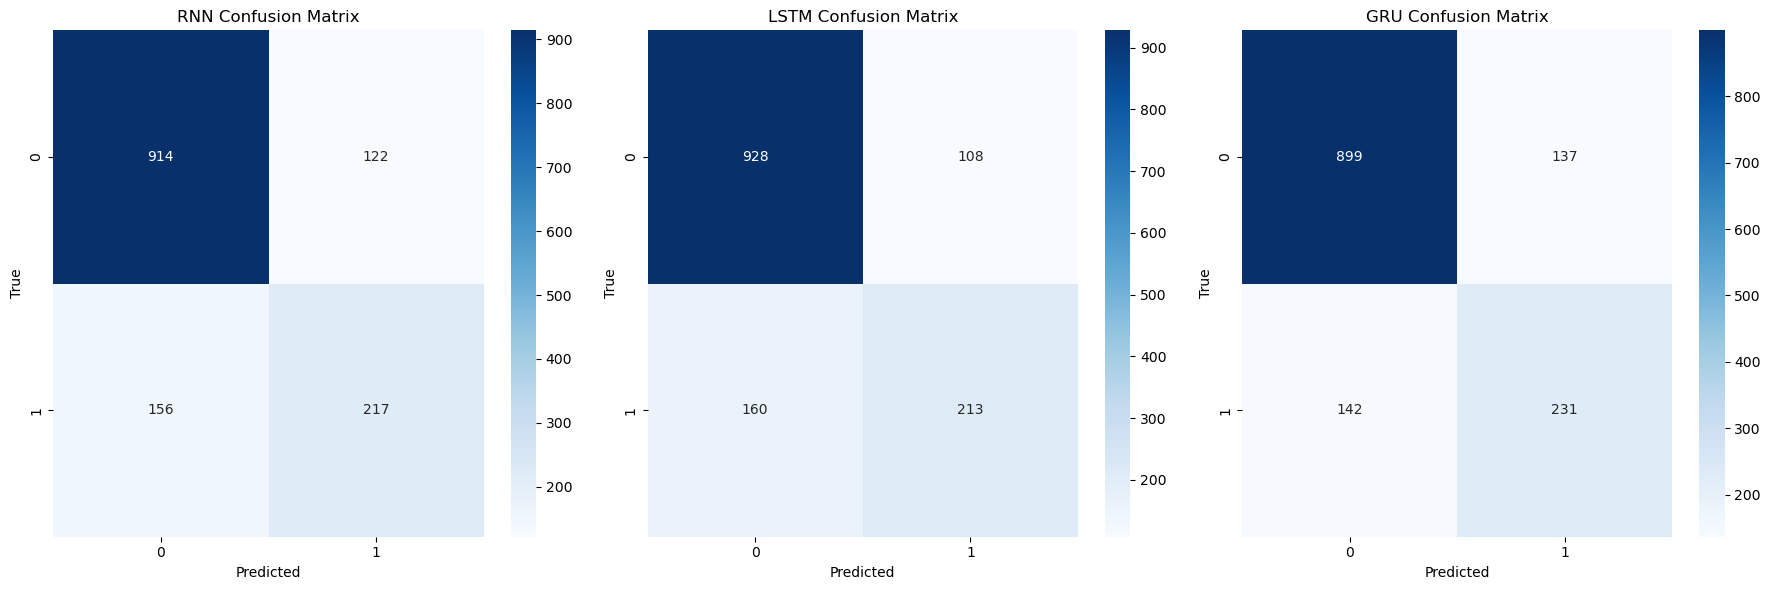

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_rnn_bin = (y_pred_rnn > 0.5).astype(int)
y_pred_lstm_bin = (y_pred_lstm > 0.5).astype(int)
y_pred_gru_bin = (y_pred_gru > 0.5).astype(int)

cm_rnn = confusion_matrix(y_test, y_pred_rnn_bin)
cm_lstm = confusion_matrix(y_test, y_pred_lstm_bin)
cm_gru = confusion_matrix(y_test, y_pred_gru_bin)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('RNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('LSTM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(cm_gru, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title('GRU Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()


In [21]:
print(f"RNN Accuracy: {rnn_acc*100:.2f}%")
print(f"LSTM Accuracy: {lstm_acc*100:.2f}%")
print(f"GRU Accuracy: {gru_acc*100:.2f}%")


RNN Accuracy: 80.27%
LSTM Accuracy: 80.98%
GRU Accuracy: 80.20%
